Wine Quality Prediction Model

In [98]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [99]:
wine = pd.read_csv("winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [100]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [101]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [102]:
wine[wine.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [103]:
wine.corr()["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

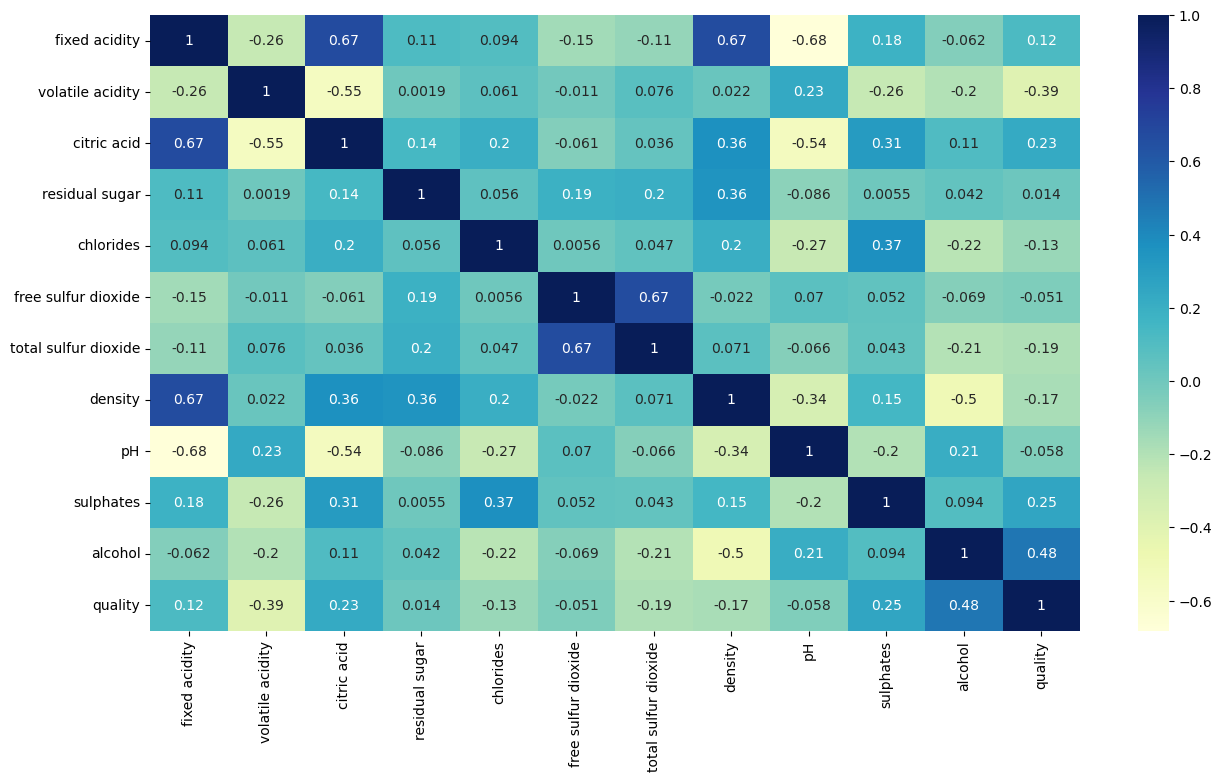

In [104]:
plt.figure(figsize=(15, 8))
sb.heatmap(wine.corr(), annot = True, cmap = 'YlGnBu')

In [105]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [106]:
wine["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [107]:
wine["goodquality"] = [1 if x >= 7 else 0 for x in wine["quality"]]
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
1218,8.2,0.400,0.31,1.9,0.082,8.0,24.0,0.99600,3.24,0.69,10.6,6,0
1503,6.2,0.440,0.39,2.5,0.077,6.0,14.0,0.99555,3.51,0.69,11.0,6,0
571,6.2,0.360,0.24,2.2,0.095,19.0,42.0,0.99460,3.57,0.57,11.7,6,0
685,8.1,0.780,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,5,0
905,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,5,0
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,5,0
654,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5,5,0
581,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,5,0
1282,7.9,0.765,0.00,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9,6,0
289,11.6,0.420,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2,5,0


In [108]:
wine["goodquality"].value_counts()

goodquality
0    1382
1     217
Name: count, dtype: int64

In [109]:
x = wine.drop(["goodquality", "quality"], axis = 1)
y = wine["goodquality"]

In [110]:
x.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
383,8.3,0.26,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.40
161,7.6,0.68,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.20
1515,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.25
679,10.8,0.26,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.60
980,9.1,0.50,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.50
97,7.0,0.50,0.25,2.0,0.070,3.0,22.0,0.99630,3.25,0.63,9.20
407,12.0,0.39,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.80
1154,6.6,0.58,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,11.40
1492,6.2,0.65,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95
340,12.2,0.34,0.50,2.4,0.066,10.0,21.0,1.00000,3.12,1.18,9.20


In [111]:
y.sample(10)

84      0
391     0
1379    0
579     0
1241    0
518     0
1044    0
969     0
194     0
1483    0
Name: goodquality, dtype: int64

In [112]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
classifier.fit(x,y)
score = classifier.feature_importances_
score

array([0.07720289, 0.09948383, 0.09301314, 0.07254346, 0.06739277,
       0.0685788 , 0.08493462, 0.08543919, 0.06904988, 0.10970322,
       0.1726582 ])

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [114]:
model_res = pd.DataFrame(columns=['Model', 'Score'])

LOGISTIC REGRESSION

In [115]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

y_test_pred = model.predict(x_test)

c:\Users\arpan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix

model_res.loc[len(model_res)] = ["Logistic Regression", accuracy_score(y_test, y_test_pred)*100]
model_res

,Model,Score
0,Logistic Regression,90.3125


K NEIGHBORS CLASSIFIER

In [117]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ["K Neighbors Classifier", accuracy_score(y_test, y_test_pred)*100]
model_res

,Model,Score
0,Logistic Regression,90.3125
1,K Neighbors Classifier,84.6875


SUPPRT VECTOR CLASSIFICATION

In [118]:
from sklearn.svm import SVC
model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ["Support Vector Classification", accuracy_score(y_test, y_test_pred)*100]
model_res

,Model,Score
0,Logistic Regression,90.3125
1,K Neighbors Classifier,84.6875
2,Support Vector Classification,84.6875


RANDOM FOREST CLASSIFIER

In [119]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ["Random Forest Classifier", accuracy_score(y_test, y_test_pred)*100]
model_res

,Model,Score
0,Logistic Regression,90.3125
1,K Neighbors Classifier,84.6875
2,Support Vector Classification,84.6875
3,Random Forest Classifier,84.6875


DECISION TREE CLASSIFIER

In [120]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ["Decision Tree Classifier", accuracy_score(y_test, y_pred) * 100]
model_res

,Model,Score
0,Logistic Regression,90.3125
1,K Neighbors Classifier,84.6875
2,Support Vector Classification,84.6875
3,Random Forest Classifier,84.6875
4,Decision Tree Classifier,89.0625


In [121]:
model_res = model_res.sort_values(by = "Score", ascending = False)
model_res

,Model,Score
0,Logistic Regression,90.3125
4,Decision Tree Classifier,89.0625
1,K Neighbors Classifier,84.6875
2,Support Vector Classification,84.6875
3,Random Forest Classifier,84.6875
